In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def show_fig(info_matrix, name=''):
    MA_l = range(10, 150, 10)
    MA_r = range(30, 400, 30)

    sns.heatmap(info_matrix,  fmt=".1f", xticklabels=MA_r, yticklabels=MA_l)
    plt.title(name)
    plt.xlabel('MA_r')
    plt.ylabel('MA_l')
    plt.show()


In [78]:
import argparse
import os
from src.prepare_data import PrepareData
from src.trader import TradeManager

class AutoTrade:
    def __init__(self, stocks_data, log_path='logs/'):
        self.stocks_data = stocks_data
        self.trader = TradeManager(self.stocks_data, init_value=1.0, log_path=log_path)
        self.trading_dates = sorted(set(date for data in self.stocks_data.values() for date in data.index))

#     def execute(self):
#         for date in self.trading_dates:
#             if not self.trader.hold_stock:
#                 for stock_name, data in self.stocks_data.items():
#                     if date in data.index and data.loc[date, '10MA'] > data.loc[date, '30MA']:
#                         self.trader.buy_stock(date, data.loc[date, 'Close'], stock_name)
#                         break
#             elif self.trader.hold_stock \
#                     and date in self.stocks_data[self.trader.hold_stock].index   \
#                     and self.stocks_data[self.trader.hold_stock].loc[date, '10MA'] < self.stocks_data[self.trader.hold_stock].loc[date, '30MA']:
#                 self.trader.sell_stock(date, 
#                                               self.stocks_data[self.trader.hold_stock].loc[date, 'Close'], 
#                                               self.trader.hold_stock)

#         self.trader.store_transactions()
#         total_return = self.trader.display_transactions()
#         return total_return

    def execute(self):
        last_10MA = 0 
        last_30MA = 0
        for date in self.trading_dates:
            if not self.trader.hold_stock:
                for stock_name, data in self.stocks_data.items():
                    if date in data.index and data.loc[date, '10MA'] > data.loc[date, '30MA'] and \
                       data.loc[date, '10MA'] > last_10MA and data.loc[date, '30MA'] > last_30MA and \
                       data.loc[date, '10MA'] > data.loc[date, 'Close']:
                            self.trader.buy_stock(date, data.loc[date, 'Close'], stock_name)
                            break
            elif self.trader.hold_stock \
                    and date in self.stocks_data[self.trader.hold_stock].index   \
                    and self.stocks_data[self.trader.hold_stock].loc[date, 'Close'] < self.stocks_data[self.trader.hold_stock].loc[date, '10MA'] \
                    and self.stocks_data[self.trader.hold_stock].loc[date, '10MA'] < last_10MA \
                    and self.stocks_data[self.trader.hold_stock].loc[date, '30MA'] < last_30MA \
                    and self.stocks_data[self.trader.hold_stock].loc[date, '10MA'] < self.stocks_data[self.trader.hold_stock].loc[date, '30MA']:
                self.trader.sell_stock(date, 
                                              self.stocks_data[self.trader.hold_stock].loc[date, 'Close'], 
                                              self.trader.hold_stock)
            if date in data.index:
                last_10MA = data.loc[date, '10MA']
                last_30MA = data.loc[date, '30MA']

        self.trader.store_transactions()
        total_return = self.trader.display_transactions()
        return total_return
        

def main(files_path=None):
    import numpy as np
    range_a = range(10, 150, 10)
    range_b = range(30, 400, 30)
    infos = np.zeros((len(range_a), len(range_b)))
    for ii, i in enumerate(range_a):
        for jj, j in enumerate(range_b):
            if i >= j:
                continue
            stocks_data = {}
            if files_path.endswith('.csv'):
                data = PrepareData(files_path).data
                data['10MA'] = data['Close'].rolling(window=i).mean()
                data['30MA'] = data['Close'].rolling(window=j).mean()
                stock_name = os.path.splitext(files_path)[0].split('/')[-1]
                stocks_data[stock_name] = data
            else:
                for file_name in os.listdir(files_path):
                    if file_name.endswith('.csv'):
                        file_path = os.path.join(files_path, file_name)
                        data = PrepareData(file_path).data
                        data['10MA'] = data['Close'].rolling(window=i).mean()
                        data['30MA'] = data['Close'].rolling(window=j).mean()
                        stock_name = os.path.splitext(file_name)[0]
                        stocks_data[stock_name] = data
            auto_trade = AutoTrade(stocks_data)
            total_return = auto_trade.execute()
            infos[ii, jj] = round(total_return, 2)
    return infos



In [82]:
m2_nas100 = main('stock_data/futu.csv')

Bought futu on 2019-11-13 at 10.95
Sold futu on 2019-11-26 at 10.56, Return Rate: -3.55%, Hold Duration: 13 days

Bought futu on 2020-01-24 at 11.05
Sold futu on 2020-03-12 at 10.42, Return Rate: -5.68%, Hold Duration: 48 days

Bought futu on 2020-06-11 at 18.16
Sold futu on 2020-09-10 at 31.08, Return Rate: 70.93%, Hold Duration: 91 days

Bought futu on 2020-10-19 at 30.96
Sold futu on 2020-12-28 at 38.91, Return Rate: 25.60%, Hold Duration: 70 days

Bought futu on 2021-02-23 at 167.19
Sold futu on 2021-03-23 at 115.26, Return Rate: -30.97%, Hold Duration: 28 days

Bought futu on 2021-05-04 at 142.34
Sold futu on 2021-05-11 at 127.96, Return Rate: -10.07%, Hold Duration: 7 days

Bought futu on 2021-06-16 at 146.12
Sold futu on 2021-07-13 at 135.11, Return Rate: -7.51%, Hold Duration: 27 days

Bought futu on 2022-02-17 at 44.28
Sold futu on 2022-02-24 at 40.78, Return Rate: -7.88%, Hold Duration: 7 days

Bought futu on 2022-06-13 at 41.51
Sold futu on 2022-07-22 at 44.65, Return Rate: 

┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2019-11-13 │ 2019-11-26 │     10.95 │      10.56 │      -3.55% │            13 │
│       futu │ 2020-01-24 │ 2020-03-12 │     11.05 │      10.42 │      -5.68% │            48 │
│       futu │ 2020-06-11 │ 2020-09-10 │     18.16 │      31.08 │      70.93% │            91 │
│       futu │ 2020-10-19 │ 2020-12-28 │     30.96 │      38.91 │      25.60% │            70 │
│       futu │ 2021-02-23 │ 2021-03-23 │    167.19 │     115.26 │     -30.97% │            28 │
│       futu │ 2021-05-04 │ 2021-05-11 │    142.34 │     127.96 │     -10.07% │             7 │
│       futu │ 2021-06-16 │ 2021-07-13 │    146.12 │     135.11 │      -7.51% │            27 │
│       futu │ 2022-02-17 │ 2022-02-24 │     44.28 │      40.78 │      -7.88% │             7 │
│       futu │ 2022-06-13 │ 2022-07-22 │     41.51 │      44.65 │       7.54% │            39 │
│       futu │ 2022-09-07 │ 2022-09-22 │     44.41 │      39.68 │     -10.62% │            15 │
│       futu │ 2022-12-16 │ 2022-12-30 │     66.47 │      40.65 │     -38.73% │            14 │
│       futu │ 2023-04-05 │ 2023-04-24 │      48.3 │      44.14 │      -8.59% │            19 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │ -44.39% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    0.56 │
└───────────────────┴─────────┘

Bought futu on 2019-08-30 at 10.80
Sold futu on 2019-10-04 at 10.53, Return Rate: -2.49%, Hold Duration: 35 days

Bought futu on 2020-01-24 at 11.05
Sold futu on 2020-03-18 at 8.89, Return Rate: -19.49%, Hold Duration: 54 days

Bought futu on 2020-06-11 at 18.16
Sold futu on 2020-09-29 at 28.50, Return Rate: 56.77%, Hold Duration: 110 days

Bought futu on 2020-11-27 at 43.98
Sold futu on 2021-05-06 at 134.33, Return Rate: 204.82%, Hold Duration: 160 days

Bought futu on 2021-06-10 at 144.12
Sold futu on 2021-07-15 at 134.80, Return Rate: -6.45%, Hold Duration: 35 days

Bought futu on 2022-06-13 at 41.51
Sold futu on 2022-09-16 at 41.00, Return Rate: -1.22%, Hold Duration: 95 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-02-10 at 45.90, Return Rate: -30.85%, Hold Duration: 56 days

Bought futu on 2023-04-05 at 48.30
Sold futu on 2023-04-20 at 47.03, Return Rate: -2.62%, Hold Duration: 15 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2019-08-30 │ 2019-10-04 │      10.8 │      10.53 │      -2.49% │            35 │
│       futu │ 2020-01-24 │ 2020-03-18 │     11.05 │       8.89 │     -19.49% │            54 │
│       futu │ 2020-06-11 │ 2020-09-29 │     18.16 │       28.5 │      56.77% │           110 │
│       futu │ 2020-11-27 │ 2021-05-06 │     43.98 │     134.33 │     204.82% │           160 │
│       futu │ 2021-06-10 │ 2021-07-15 │    144.12 │      134.8 │      -6.45% │            35 │
│       futu │ 2022-06-13 │ 2022-09-16 │     41.51 │       41.0 │      -1.22% │            95 │
│       futu │ 2022-12-16 │ 2023-02-10 │     66.47 │       45.9 │     -30.85% │            56 │
│       futu │ 2023-04-05 │ 2023-04-20 │      48.3 │      47.03 │      -2.62% │            15 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │ 133.41% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    2.33 │
└───────────────────┴─────────┘

Bought futu on 2019-11-14 at 11.03
Sold futu on 2019-11-25 at 10.66, Return Rate: -3.34%, Hold Duration: 11 days

Bought futu on 2020-02-24 at 12.00
Sold futu on 2020-03-19 at 8.77, Return Rate: -26.84%, Hold Duration: 24 days

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-07-16 at 133.40, Return Rate: 632.68%, Hold Duration: 400 days

Bought futu on 2022-06-16 at 42.40
Sold futu on 2022-10-11 at 35.08, Return Rate: -17.21%, Hold Duration: 117 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-03-28 at 46.20, Return Rate: -30.40%, Hold Duration: 102 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2019-11-14 │ 2019-11-25 │     11.03 │      10.66 │      -3.34% │            11 │
│       futu │ 2020-02-24 │ 2020-03-19 │      12.0 │       8.77 │     -26.84% │            24 │
│       futu │ 2020-06-11 │ 2021-07-16 │     18.16 │      133.4 │     632.68% │           400 │
│       futu │ 2022-06-16 │ 2022-10-11 │      42.4 │      35.08 │     -17.21% │           117 │
│       futu │ 2022-12-16 │ 2023-03-28 │     66.47 │       46.2 │     -30.40% │           102 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │ 198.53% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    2.99 │
└───────────────────┴─────────┘

Bought futu on 2020-01-24 at 11.05
Sold futu on 2020-03-19 at 8.77, Return Rate: -20.57%, Hold Duration: 55 days

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-07-26 at 115.44, Return Rate: 534.08%, Hold Duration: 410 days

Bought futu on 2022-06-13 at 41.51
Sold futu on 2022-09-27 at 38.11, Return Rate: -8.17%, Hold Duration: 106 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-02-23 at 44.81, Return Rate: -32.49%, Hold Duration: 69 days

Bought futu on 2023-03-09 at 45.95
Sold futu on 2023-05-08 at 41.26, Return Rate: -10.18%, Hold Duration: 60 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2020-01-24 │ 2020-03-19 │     11.05 │       8.77 │     -20.57% │            55 │
│       futu │ 2020-06-11 │ 2021-07-26 │     18.16 │     115.44 │     534.08% │           410 │
│       futu │ 2022-06-13 │ 2022-09-27 │     41.51 │      38.11 │      -8.17% │           106 │
│       futu │ 2022-12-16 │ 2023-02-23 │     66.47 │      44.81 │     -32.49% │            69 │
│       futu │ 2023-03-09 │ 2023-05-08 │     45.95 │      41.26 │     -10.18% │            60 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │ 180.47% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    2.80 │
└───────────────────┴─────────┘

Bought futu on 2020-01-24 at 11.05
Sold futu on 2020-03-19 at 8.77, Return Rate: -20.57%, Hold Duration: 55 days

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-09-16 at 94.71, Return Rate: 420.27%, Hold Duration: 462 days

Bought futu on 2022-07-07 at 52.20
Sold futu on 2022-09-29 at 36.40, Return Rate: -30.18%, Hold Duration: 84 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-06-21 at 39.90, Return Rate: -39.85%, Hold Duration: 187 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2020-01-24 │ 2020-03-19 │     11.05 │       8.77 │     -20.57% │            55 │
│       futu │ 2020-06-11 │ 2021-09-16 │     18.16 │      94.71 │     420.27% │           462 │
│       futu │ 2022-07-07 │ 2022-09-29 │      52.2 │       36.4 │     -30.18% │            84 │
│       futu │ 2022-12-16 │ 2023-06-21 │     66.47 │       39.9 │     -39.85% │           187 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │  73.54% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    1.74 │
└───────────────────┴─────────┘

Bought futu on 2020-02-24 at 12.00
Sold futu on 2020-03-19 at 8.77, Return Rate: -26.84%, Hold Duration: 24 days

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-10-06 at 83.39, Return Rate: 358.12%, Hold Duration: 482 days

Bought futu on 2022-09-06 at 43.72
Sold futu on 2022-09-28 at 38.58, Return Rate: -11.72%, Hold Duration: 22 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-03-17 at 45.07, Return Rate: -32.10%, Hold Duration: 91 days

Bought futu on 2023-04-05 at 48.30
Sold futu on 2023-05-16 at 41.24, Return Rate: -14.57%, Hold Duration: 41 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2020-02-24 │ 2020-03-19 │      12.0 │       8.77 │     -26.84% │            24 │
│       futu │ 2020-06-11 │ 2021-10-06 │     18.16 │      83.39 │     358.12% │           482 │
│       futu │ 2022-09-06 │ 2022-09-28 │     43.72 │      38.58 │     -11.72% │            22 │
│       futu │ 2022-12-16 │ 2023-03-17 │     66.47 │      45.07 │     -32.10% │            91 │
│       futu │ 2023-04-05 │ 2023-05-16 │      48.3 │      41.24 │     -14.57% │            41 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │  71.64% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    1.72 │
└───────────────────┴─────────┘

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-11-05 at 56.49, Return Rate: 210.44%, Hold Duration: 512 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-04-25 at 42.93, Return Rate: -35.31%, Hold Duration: 130 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2020-06-11 │ 2021-11-05 │     18.16 │      56.49 │     210.44% │           512 │
│       futu │ 2022-12-16 │ 2023-04-25 │     66.47 │      42.93 │     -35.31% │           130 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │ 100.83% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    2.01 │
└───────────────────┴─────────┘

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-12-02 at 41.29, Return Rate: 126.99%, Hold Duration: 539 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-05-19 at 38.09, Return Rate: -42.57%, Hold Duration: 154 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2020-06-11 │ 2021-12-02 │     18.16 │      41.29 │     126.99% │           539 │
│       futu │ 2022-12-16 │ 2023-05-19 │     66.47 │      38.09 │     -42.57% │           154 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │  30.36% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    1.30 │
└───────────────────┴─────────┘

Bought futu on 2020-06-11 at 18.16
Sold futu on 2021-12-13 at 41.70, Return Rate: 129.24%, Hold Duration: 550 days

Bought futu on 2022-12-16 at 66.47
Sold futu on 2023-07-06 at 39.83, Return Rate: -39.96%, Hold Duration: 202 days



┏━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Stock Name ┃   Buy Date ┃  Sell Date ┃ Buy Price ┃ Sell Price ┃ Return Rate ┃ Hold Duration ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│       futu │ 2020-06-11 │ 2021-12-13 │     18.16 │       41.7 │     129.24% │           550 │
│       futu │ 2022-12-16 │ 2023-07-06 │     66.47 │      39.83 │     -39.96% │           202 │
└────────────┴────────────┴────────────┴───────────┴────────────┴─────────────┴───────────────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃       0_th Trader ┃   Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      Total Return │  37.64% │
│ Buy & Hold Return │ 176.37% │
│        Init Value │    1.00 │
│     Current Value │    1.38 │
└───────────────────┴─────────┘

KeyboardInterrupt: 

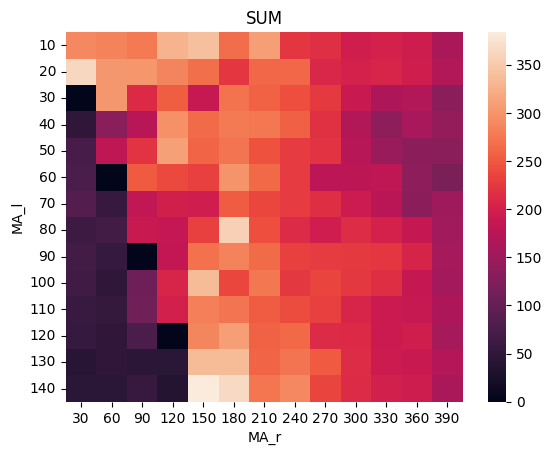

In [48]:
show_fig((m_dongfang + m_li + m_nas100 + m_ximenzi + m_apple + m_ali)/6, "SUM")

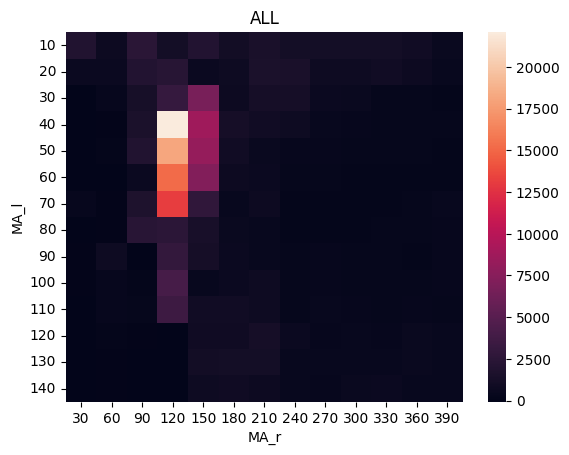

In [55]:
show_fig(m_all, 'ALL')

In [52]:
m_all[3,:]

array([  -64.76,    51.68,  1544.54, 22091.6 ,  8729.4 ,  1226.43,
         890.32,   733.57,   383.31,   299.66,   259.7 ,   275.07,
         202.73])

In [58]:
m_all[4,:]

array([-1.721000e+01,  1.157100e+02,  1.880580e+03,  1.819483e+04,
        8.222240e+03,  9.442100e+02,  4.679500e+02,  3.091400e+02,
        3.633700e+02,  2.124500e+02,  1.912900e+02,  1.988300e+02,
        1.424900e+02])

In [91]:
def calculate_annual_compound_return(days, total_return_percent):
    years = days / 365  # 将天数转换为年数
    total_return = total_return_percent / 100  # 将总收益率转换为小数
    annual_compound_return = (total_return + 1) ** (1/years) - 1
    return annual_compound_return

# 使用函数
days = 720
total_return_percent = 89
annual_compound_return = calculate_annual_compound_return(days, total_return_percent)
print(f"年复合收益率是 {annual_compound_return:.2%}")

年复合收益率是 38.09%


In [96]:
import h5py
filename = "/Users/han/Downloads/stock_daily-19940523-20230630.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
#     a_group_key = list(f.keys())[0]

#     # get the object type for a_group_key: usually group or dataset
#     print(type(f[a_group_key])) 

#     # If a_group_key is a group name, 
#     # this gets the object names in the group and returns as a list
#     data = list(f[a_group_key])

#     # If a_group_key is a dataset name, 
#     # this gets the dataset values and returns as a list
#     data = list(f[a_group_key])
#     # preferred methods to get dataset values:
#     ds_obj = f[a_group_key]      # returns as a h5py dataset object
#     ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['data']>


In [180]:
import pandas as pd

filename = "/Users/han/Documents/financial_scripts/Stock_Trading_Simulation/stock_daily-19940523-20230630.h5"
data = pd.read_hdf(filename)

# print(data.head())


In [181]:
def calculate_adj_price(df):
    price_columns = ['openPrice', 'highestPrice', 'lowestPrice', 'closePrice']
#     for col in price_columns:
    df['Open'] = df['openPrice'] * df['accumAdjFactor']
    df['High'] = df['highestPrice'] * df['accumAdjFactor']
    df['Low'] = df['lowestPrice'] * df['accumAdjFactor']
    df['Close'] = df['closePrice'] * df['accumAdjFactor']
    return df


def process_df(df):
    # 将tradeDate转换为日期格式
    df['date'] = pd.to_datetime(df['tradeDate'])
    df.drop('tradeDate', axis=1, inplace=True)
    # 将tradeDate设置为索引
    df.set_index('date', inplace=True)
    # 按照'secShortName'进行分组，并转换为字典
    result = {name: calculate_adj_price(group.sort_index()) for name, group in df.groupby('secShortName')}
    return result


In [182]:
out = process_df(data)

In [254]:
import pickle

with open('stock_daily-19940523-20230630_2.pkl', 'wb') as f:
    pickle.dump(df, f)


In [255]:
list(df.keys())[2]

'*ST一纺'

In [262]:
data = PrepareData('stock_daily-19940523-20230630_2.pkl').stock_data

AttributeError: 'PrepareData' object has no attribute 'stock_data'

In [ ]:
data.keys()

In [260]:
data['招商银行']

TypeError: 'PrepareData' object is not subscriptable

In [252]:
import pickle

with open('stock_daily-19940523-20230630.pkl', 'rb') as f:
    df = pickle.load(f)
    
    


In [244]:
from tqdm import tqdm

In [253]:
for key in tqdm(df):
    df[key] = read_and_preprocess_data(df[key])
#     break

100%|████████████████████████████████████████████████████████████████████████| 10560/10560 [1:22:09<00:00,  2.14it/s]


In [256]:
df['招商银行']

,secID,ticker,secShortName,exchangeCD,preClosePrice,actPreClosePrice,openPrice,highestPrice,lowestPrice,closePrice,...,High,Low,Close,10MA,30MA,60MA,New_Open,New_High,New_Low,New_Close
date,,,,,,,,,,,,,,,,,,,,,
2002-04-09,600036.XSHG,600036,招商银行,XSHG,7.30,7.30,10.51,10.88,10.51,10.66,...,2.009684,1.941340,1.969047,NaN,NaN,NaN,1.941340,2.009684,1.941340,1.969047
2002-04-10,600036.XSHG,600036,招商银行,XSHG,10.66,10.66,10.66,10.70,10.39,10.60,...,1.976436,1.919175,1.957964,NaN,NaN,NaN,1.955194,1.976436,1.919175,1.955656
2002-04-11,600036.XSHG,600036,招商银行,XSHG,10.60,10.60,10.60,10.68,10.49,10.52,...,1.972742,1.937646,1.943187,NaN,NaN,NaN,1.955425,1.972742,1.937646,1.952885
2002-04-12,600036.XSHG,600036,招商银行,XSHG,10.52,10.52,10.50,10.64,10.48,10.57,...,1.965353,1.935799,1.952423,NaN,NaN,NaN,1.954155,1.965353,1.935799,1.948267
2002-04-15,600036.XSHG,600036,招商银行,XSHG,10.57,10.57,10.57,10.60,10.35,10.39,...,1.957964,1.911786,1.919175,NaN,NaN,NaN,1.951211,1.957964,1.911786,1.935337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,600036.XSHG,600036,招商银行,XSHG,33.17,33.17,32.93,33.10,32.42,32.61,...,33.100000,32.420000,32.610000,33.479,34.740222,33.887500,33.381161,33.381161,32.420000,32.765000
2023-06-27,600036.XSHG,600036,招商银行,XSHG,32.61,32.61,32.63,33.01,32.44,32.82,...,33.010000,32.440000,32.820000,33.387,34.685778,33.864333,33.073080,33.073080,32.440000,32.725000
2023-06-28,600036.XSHG,600036,招商银行,XSHG,32.82,32.82,32.81,33.18,32.72,33.05,...,33.180000,32.720000,33.050000,33.319,34.630778,33.841833,32.899040,33.180000,32.720000,32.940000


In [250]:
# def calculate_score(row):
#     # improve needed
#     new_open = row['New_Open']
#     new_high = row['New_High']
#     new_low = row['New_Low']
#     new_close = row['New_Close']

#     if new_low == new_open:
#         return 1
#     elif new_close > new_open and new_low != new_open:
#         return 0.5
#     elif new_high == new_open:
#         return -1
#     elif new_close < new_open and new_high != new_open:
#         return -0.5
#     else:
#         return 0

# def calculate_growth_rate(row):
# #     growth_rate = (round(row['Close']/(row['Open']), 4) - 1)*100
#     growth_rate = np.where((row['Open'] != 0, row['Close'] / (row['Open'], 0)
#     growth_rate = (growth_rate), 4) - 1)*100
#     return growth_rate

def calculate_new_values(prev_open, prev_close, current_open, current_high, current_low, current_close):
    new_close = (current_open + current_high + current_low + current_close) / 4
    new_open = (prev_open + prev_close) / 2
    new_high = max(current_high, new_open, new_close)
    new_low = min(current_low, new_open, new_close)

    return new_open, new_high, new_low, new_close

def read_and_preprocess_data(data):
    
    data = data.reset_index()

    # Add '10MA' and '30MA' columns
    data['10MA'] = data['Close'].rolling(window=10).mean()
    data['30MA'] = data['Close'].rolling(window=90).mean()
    data['60MA'] = data['Close'].rolling(window=60).mean()

    # Initialize new columns
    data['New_Open'] = data['Open']
    data['New_High'] = data['High']
    data['New_Low'] = data['Low']
    data['New_Close'] = data['Close']

    # Calculate new values for each row
    for i in range(1, len(data)):
        prev_open, prev_close = data.loc[i - 1, ['New_Open', 'New_Close']]
        current_open, current_high, current_low, current_close = data.loc[i, ['Open', 'High', 'Low', 'Close']]

        new_open, new_high, new_low, new_close = calculate_new_values(prev_open, prev_close, current_open, current_high, current_low, current_close)

        data.at[i, 'New_Open'] = new_open
        data.at[i, 'New_High'] = new_high
        data.at[i, 'New_Low'] = new_low
        data.at[i, 'New_Close'] = new_close


    # Add 'score' column and calculate scores for each row
#     data['score'] = data.apply(calculate_score, axis=1)
#     data['growth_rate'] = data.apply(calculate_growth_rate, axis=1)

#     data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

In [276]:
import pandas as pd
import os
import pickle
import random


class PrepareData:
    def __init__(self, file_path, max_stocks_num=100):
        self.stocks_data = {}
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
            data = self.read_and_preprocess_data(df)
            stock_name = os.path.splitext(file_path)[0].split('/')[-1]
            self.stocks_data[stock_name] = data
        elif file_path.endswith('.pkl'):
            with open(file_path, 'rb') as f:
                df = pickle.load(f)
            self.stocks = random.sample(list(df.keys()), max_stocks_num)
            self.stocks_data = {stock:df[stock] for stock in self.stocks}
        else:   # a bunch of csv files
            for file_name in os.listdir(file_path):
#                 if file_name.endswith('.csv'):
                csv_path = os.path.join(file_path, file_name)
                df = pd.read_csv(csv_path)
                data = self.read_and_preprocess_data(df)
                stock_name = os.path.splitext(file_name)[0]
                self.stocks_data[stock_name] = data
        
    def calculate_score(self, row):
        # improve needed
        new_open = row['New_Open']
        new_high = row['New_High']
        new_low = row['New_Low']
        new_close = row['New_Close']

        if new_low == new_open:
            return 1
        elif new_close > new_open and new_low != new_open:
            return 0.5
        elif new_high == new_open:
            return -1
        elif new_close < new_open and new_high != new_open:
            return -0.5
        else:
            return 0
        
    def calculate_growth_rate(self, row):
        growth_rate = (round(row['Close']/row['Open'], 4) - 1)*100
        return growth_rate
        
    def calculate_new_values(self, prev_open, prev_close, current_open, current_high, current_low, current_close):
        new_close = (current_open + current_high + current_low + current_close) / 4
        new_open = (prev_open + prev_close) / 2
        new_high = max(current_high, new_open, new_close)
        new_low = min(current_low, new_open, new_close)

        return new_open, new_high, new_low, new_close

    def read_and_preprocess_data(self, data):
        
        # Add '10MA' and '30MA' columns
        data['10MA'] = data['Close'].rolling(window=10).mean()
        data['30MA'] = data['Close'].rolling(window=90).mean()
        data['60MA'] = data['Close'].rolling(window=60).mean()
        
        # Initialize new columns
        data['New_Open'] = data['Open']
        data['New_High'] = data['High']
        data['New_Low'] = data['Low']
        data['New_Close'] = data['Close']

        # Calculate new values for each row
        for i in range(1, len(data)):
            prev_open, prev_close = data.loc[i - 1, ['New_Open', 'New_Close']]
            current_open, current_high, current_low, current_close = data.loc[i, ['Open', 'High', 'Low', 'Close']]

            new_open, new_high, new_low, new_close = self.calculate_new_values(prev_open, prev_close, current_open, current_high, current_low, current_close)

            data.at[i, 'New_Open'] = new_open
            data.at[i, 'New_High'] = new_high
            data.at[i, 'New_Low'] = new_low
            data.at[i, 'New_Close'] = new_close


        # Add 'score' column and calculate scores for each row
        data['score'] = data.apply(self.calculate_score, axis=1)
        data['growth_rate'] = data.apply(self.calculate_growth_rate, axis=1)
        
        data['date'] = pd.to_datetime(data['date'])
        data.set_index('date', inplace=True)
        return data
